# Model comparisons - 04 Shorttle et al. (2014)
This notebook compares the calculation results from pyMelt to the figures published in the Shorttle et al. (2014) manuscript.

Import required packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyMelt as m

## Figure D6a - position of solidus and 1330 degC adiabat
Calculate solidus and adiabat. Change the thermodynamic parameters of ```shorttle.kg1``` lithology from the pyMelt default options to match those usedin the manuscript:

In [2]:
shorttle = m.lithologies.shorttle.kg1(CP=1140, DeltaS=380, alphas=30)

P = np.linspace(0.0, 5.5, 56)

shorttle_solidus = [shorttle.TSolidus(p) for p in P]

mantle = m.mantle([shorttle],[1],['Lz'])
column = mantle.adiabaticMelt(1330, Pstart=5.5)

Overlay the figure from Shorttle et al. and plot calculated lines (purple dotted):

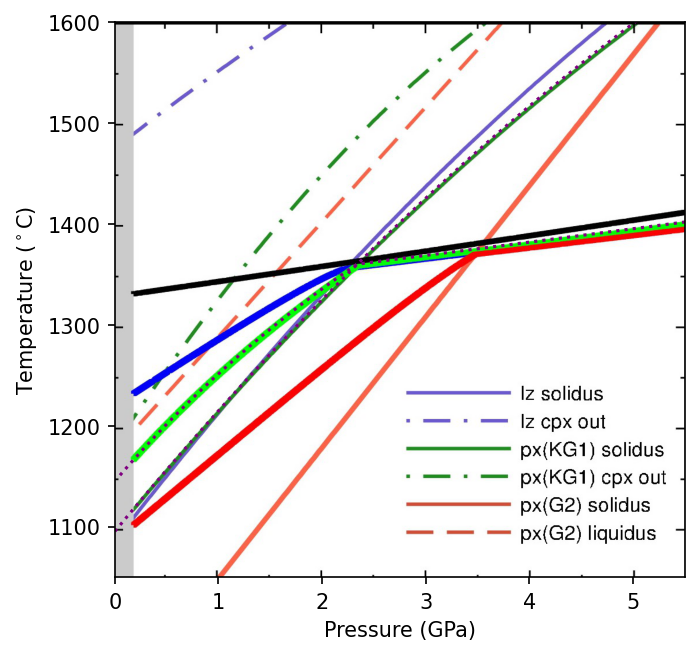

In [3]:
f, a = plt.subplots(figsize=(4.90, 4.90), dpi=150)

pub = plt.imread('figures/shorttle_figd6a.jpg')

a.set_xlim(0.0, 5.5)
a.set_ylim(1050, 1600)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(P, shorttle_solidus, c='purple', ls=':')
a.plot(column.P, column.T, c='purple', ls=':')

a.set_ylabel('Temperature ($^\circ$C)')
a.set_xlabel('Pressure (GPa)')

plt.show()

## Figure D6b - KG1 melt fraction curves

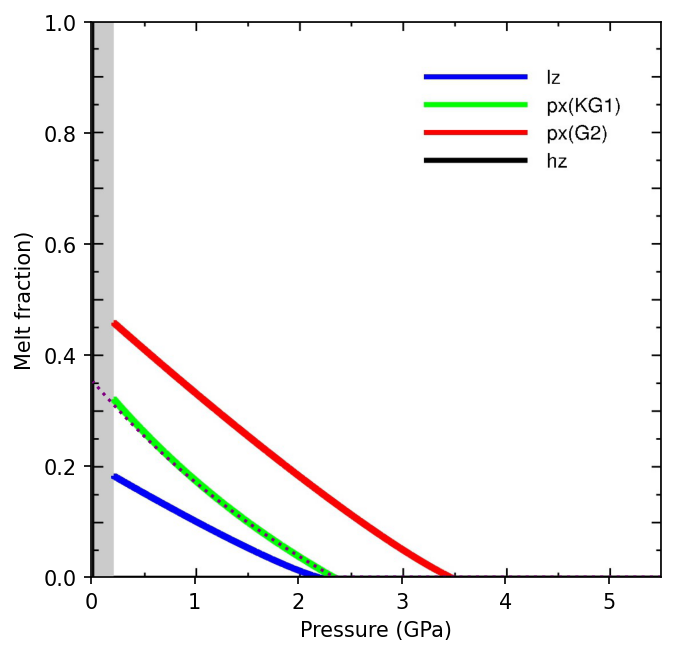

In [4]:
f, a = plt.subplots(figsize=(4.90, 4.90), dpi=150)

pub = plt.imread('figures/shorttle_figd6b.jpg')

a.set_xlim(0.0, 5.5)
a.set_ylim(0.0, 1.0)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(column.P, column.F, c='purple', ls=':')

a.set_ylabel('Melt fraction)')
a.set_xlabel('Pressure (GPa)')

plt.show()